**Some EDA**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

According to the website, there are 6 subjects with double entries (follow-up visits) in the dataset so I'm clearing those out from the dataset.

In [38]:
df=pd.read_csv("UCSF-PDGM-metadata_v5.csv")


df=df[~df["ID"].isin(["UCSF-PDGM-0433_FU007d", "UCSF-PDGM-0431_FU001d","UCSF-PDGM-0396_FU175d", "UCSF-PDGM-0429_FU003d", "UCSF-PDGM-0409_FU001d", "UCSF-PDGM-0391_FU016d"])]
print(len(df))
df.head()

495


,ID,Sex,Age at MRI,WHO CNS Grade,Final pathologic diagnosis (WHO 2021),MGMT status,MGMT index,1p/19q,IDH,1-dead 0-alive,OS,EOR,Biopsy prior to imaging,BraTS21 ID,BraTS21 Segmentation Cohort,BraTS21 MGMT Cohort
0,UCSF-PDGM-004,M,66,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,1303.0,STR,No,BraTS2021_00097,Training,Training
1,UCSF-PDGM-005,F,80,4,"Glioblastoma, IDH-wildtype",indeterminate,unknown,unknown,wildtype,1,274.0,biopsy,No,NaN,NaN,NaN
2,UCSF-PDGM-007,M,70,4,"Glioblastoma, IDH-wildtype",indeterminate,unknown,unknown,wildtype,1,417.0,STR,No,BraTS2021_00103,Training,NaN
3,UCSF-PDGM-008,M,70,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,185.0,STR,No,NaN,NaN,NaN
4,UCSF-PDGM-009,F,68,4,"Glioblastoma, IDH-wildtype",negative,0,unknown,wildtype,1,389.0,STR,No,BraTS2021_00049,Training,Training


Terminology

WHO CNS grades - grade II-IV

Final Pathologic diagnosis - four types: Glioblastoma + IDH-wildtype; Astrocytoma + IDH-mutant; Oligodendroglioma + IDH-mutant + 1p/19q-codeleted; Astrocytoma+ IDH-wildtype.

MGMT status - negative, positive, indeterminate, unknown  (All grade IV tumors were tested for MGMT methylation status; Some grades II, III were tested too but not all which is why there are a lot of unknowns)

MGMT index - 0-17, unknown

1p/19q (1p=the short arm of chromosome 1; 19q=the long arm of chromosome 19; codeletion generally implies better prognosis and better response to chemo) - intact, co-deletion, relative co-deletion, unknown

IDH (the 2nd-7th are called "IDH-mutant" type)- 'wildtype', 'mutated (NOS)', 'IDH1 p.R132H', 'IDH1 p.R132C','IDH1 p.R132G', 'IDH2 p.R172K', 'IDH1 p.R132S', 'IDH2 p.Arg172Trp','IDH1 p.Arg132His'

1-dead 0-alive - Survival status of the patient at last clinical follow up.

OS- overall survival (measured in days) from initial diagnosis to last clinical follow up.

Below is what I copied from Chatgpt to understand better the distinction/similarities between the grades and the types above:
1. Glioblastoma + IDH-wildtype
    The most aggressive diffuse glioma (WHO grade IV).
    IDH-wildtype → no mutation in IDH1 or IDH2.
    Typically occurs in older adults.
    Histologic features: necrosis, microvascular proliferation.
    Prognosis: poor, median survival ~12–18 months even with treatment.

3. Astrocytoma + IDH-mutant
    Lower- to mid-grade diffuse glioma (WHO grade II or III).
    IDH-mutant → mutation in IDH1 or IDH2 gene.
    1p/19q intact → distinguishes it from oligodendroglioma.
    Derived from astrocytic lineage (star-shaped glial cells).
    Prognosis: better than glioblastoma, especially for grade II.

4. Oligodendroglioma + IDH-mutant + 1p/19q-codeleted
    Classic oligodendroglioma.
    Must satisfy both: IDH mutation, 1p/19q codeletion (loss of short arm of chromosome 1 and long arm of 19).
    Typically WHO grade II or III.
    Responds well to chemotherapy.

5. Astrocytoma + IDH-wildtype
    Astrocytoma histology but no IDH mutation.
    Less common in lower grades; sometimes behaves aggressively.
    Considered biologically closer to glioblastoma than IDH-mutant astrocytomas.
    Prognosis: worse than IDH-mutant astrocytomas, better than glioblastoma in some grade II/III cases.
    Prognosis: generally favorable among diffuse gliomas.

In [7]:
print(df["Final pathologic diagnosis (WHO 2021)"].unique())

#proportion of each grade
print(df["WHO CNS Grade"].value_counts(normalize=True))

#proportion of each tumor type
print(df["Final pathologic diagnosis (WHO 2021)"].value_counts(normalize=True))

#how many males
print(f"percentage of males:", (df["Sex"] == "M").sum()/len(df))

#how many males vs females in each grade
print(f"Percentage of males in each grade:", df.groupby("WHO CNS Grade")["Sex"].apply(lambda x: (x.isna() | (x == "M")).sum()/len(x)))

#how many unknown MGMT status in each grade
print(df.groupby("WHO CNS Grade")["MGMT status"].apply(lambda x: (x.isna() | (x == "unknown")).sum()))

print(df["IDH"].unique())

#IDH mutations (ie not wild type) in each grade (according to internet, IDH mutations exist more in lower grades)
print("IDH mutations in each grade", df.groupby("WHO CNS Grade")["IDH"].apply(lambda x: (x.isna() | (x != "wildtype")).sum()/len(x)))

['Glioblastoma, IDH-wildtype' 'Astrocytoma, IDH-mutant'
 'Oligodendroglioma, IDH-mutant, 1p/19q-codeleted'
 'Astrocytoma, IDH-wildtype']
WHO CNS Grade
4    0.800000
2    0.113131
3    0.086869
Name: proportion, dtype: float64
Final pathologic diagnosis (WHO 2021)
Glioblastoma, IDH-wildtype                         0.743434
Astrocytoma, IDH-mutant                            0.181818
Astrocytoma, IDH-wildtype                          0.048485
Oligodendroglioma, IDH-mutant, 1p/19q-codeleted    0.026263
Name: proportion, dtype: float64
percentage of males: 0.597979797979798
Percentage of males in each grade: WHO CNS Grade
2    0.553571
3    0.604651
4    0.603535
Name: Sex, dtype: float64
WHO CNS Grade
2    48
3    20
4    12
Name: MGMT status, dtype: int64
['wildtype' 'mutated (NOS)' 'IDH1 p.R132H' 'IDH1 p.R132C' 'IDH1 p.R132G'
 'IDH2 p.R172K' 'IDH1 p.R132S' 'IDH2 p.Arg172Trp' 'IDH1 p.Arg132His']
IDH mutations in each grade WHO CNS Grade
2    0.821429
3    0.674419
4    0.070707
Name: IDH,

In [6]:
df[df["MGMT status"] == "negative"]["MGMT index"].value_counts()
df[(df["MGMT status"] == "negative") & (df["MGMT index"] == "unknown")]

print(len(df[(df["Final pathologic diagnosis (WHO 2021)"].isin(["Astrocytoma, IDH-mutant","Oligodendroglioma, IDH-mutant, 1p/19q-codeleted"])) & (df["IDH"] != "wildtype")]))
print(len(df[(df["Final pathologic diagnosis (WHO 2021)"].isin(["Astrocytoma, IDH-mutant","Oligodendroglioma, IDH-mutant, 1p/19q-codeleted"]))]))

print(len(df[df["Final pathologic diagnosis (WHO 2021)"]=="Astrocytoma, IDH-mutant"]))
print(len(df[(df["Final pathologic diagnosis (WHO 2021)"]=="Astrocytoma, IDH-mutant") & (df["1p/19q"] != "co-deletion")]))

print(len(df[df["Final pathologic diagnosis (WHO 2021)"]=="Astrocytoma, IDH-wildtype"]))
print(len(df[(df["Final pathologic diagnosis (WHO 2021)"]=="Astrocytoma, IDH-wildtype") & (df["1p/19q"] != "co-deletion")]))

print(len(df[(df["Final pathologic diagnosis (WHO 2021)"]=="Astrocytoma, IDH-wildtype") & (df["WHO CNS Grade"]=="4")]))

103
103
90
90
24
24
0


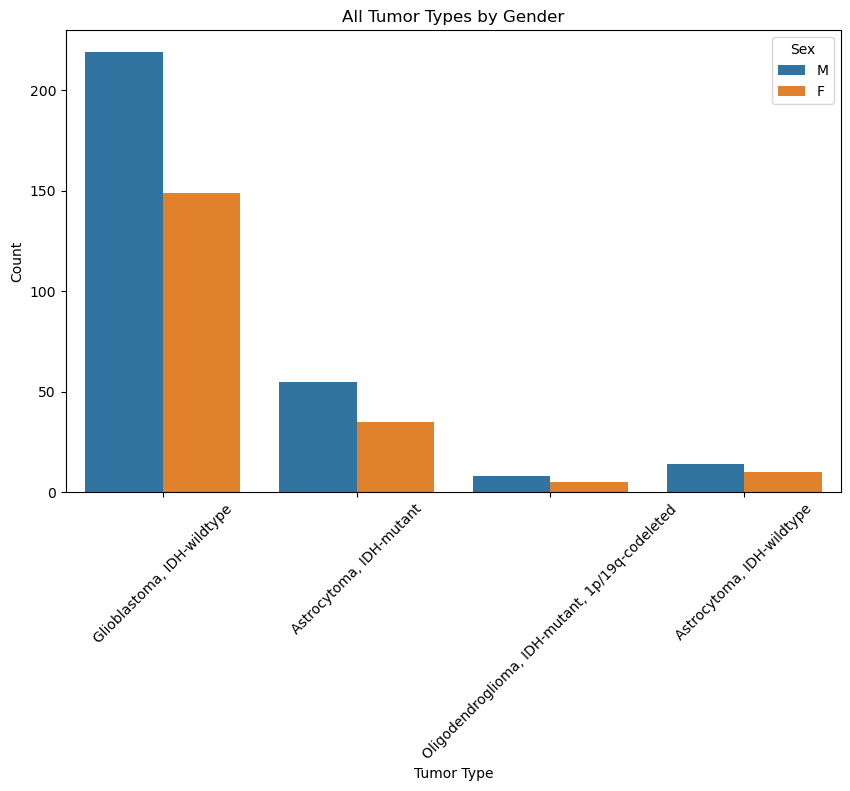

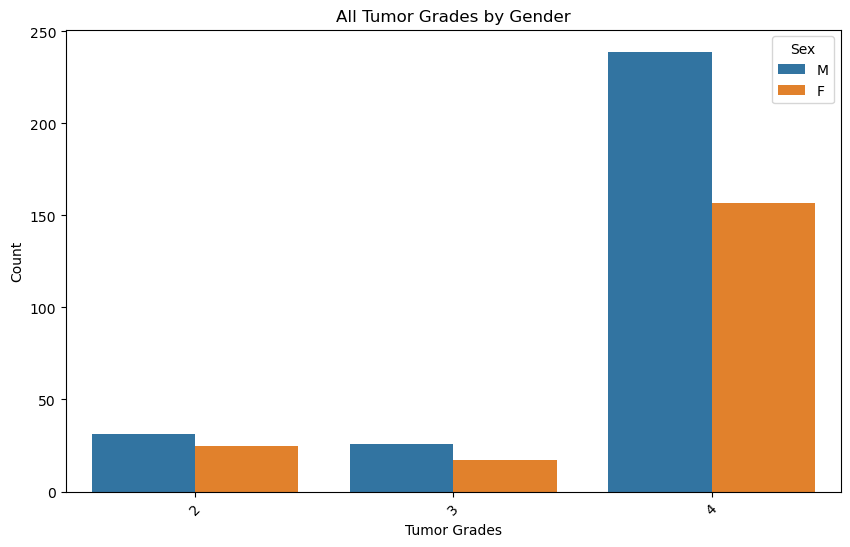

In [65]:
#Plots: Sex vs Grades, Sex vs Tumor types
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Final pathologic diagnosis (WHO 2021)",
    hue="Sex"         # bars split by gender
)

plt.title("All Tumor Types by Gender")
plt.xticks(rotation=45)
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="WHO CNS Grade",
    hue="Sex"         # bars split by gender
)

plt.title("All Tumor Grades by Gender")
plt.xticks(rotation=45)
plt.xlabel("Tumor Grades")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()


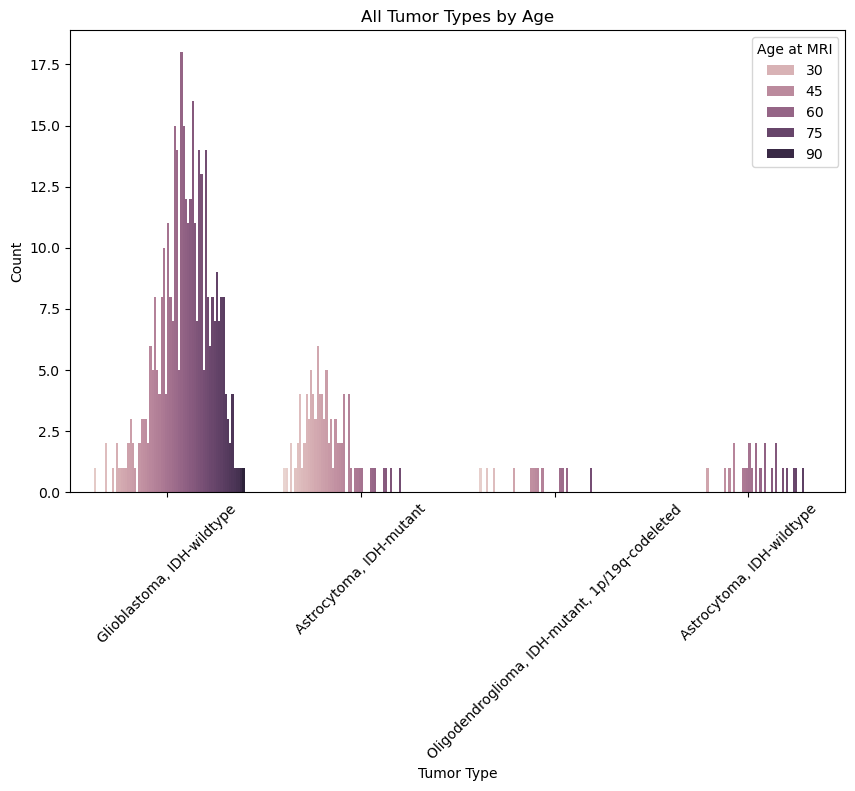

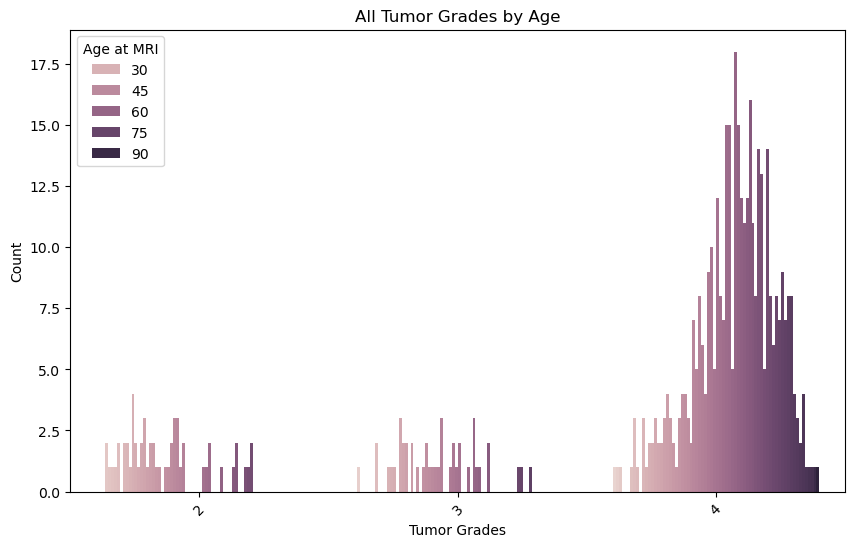

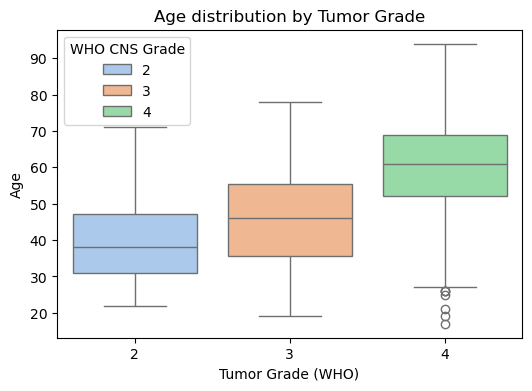

In [10]:
#Plots: Age vs Grades, Age vs Tumor types
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Final pathologic diagnosis (WHO 2021)",
    hue="Age at MRI"        
)

plt.title("All Tumor Types by Age")
plt.xticks(rotation=45)
plt.xlabel("Tumor Type")
plt.ylabel("Count")
plt.legend(title="Age at MRI")
plt.show()

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="WHO CNS Grade",
    hue="Age at MRI"
)

plt.title("All Tumor Grades by Age")
plt.xticks(rotation=45)
plt.xlabel("Tumor Grades")
plt.ylabel("Count")
plt.legend(title="Age at MRI")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='WHO CNS Grade', y='Age at MRI', data=df, palette='pastel', hue='WHO CNS Grade')
plt.xlabel('Tumor Grade (WHO)')
plt.ylabel('Age')
plt.title('Age distribution by Tumor Grade')
plt.show()

It's probably not too clear how to read the above so I created age groups: <30, 30-45, 45-60, 75+ and do the same plots again. 

17
94
Age_Group
60-75    0.371257
45-60    0.299401
30-45    0.161677
75+      0.117764
<30      0.049900
Name: proportion, dtype: float64


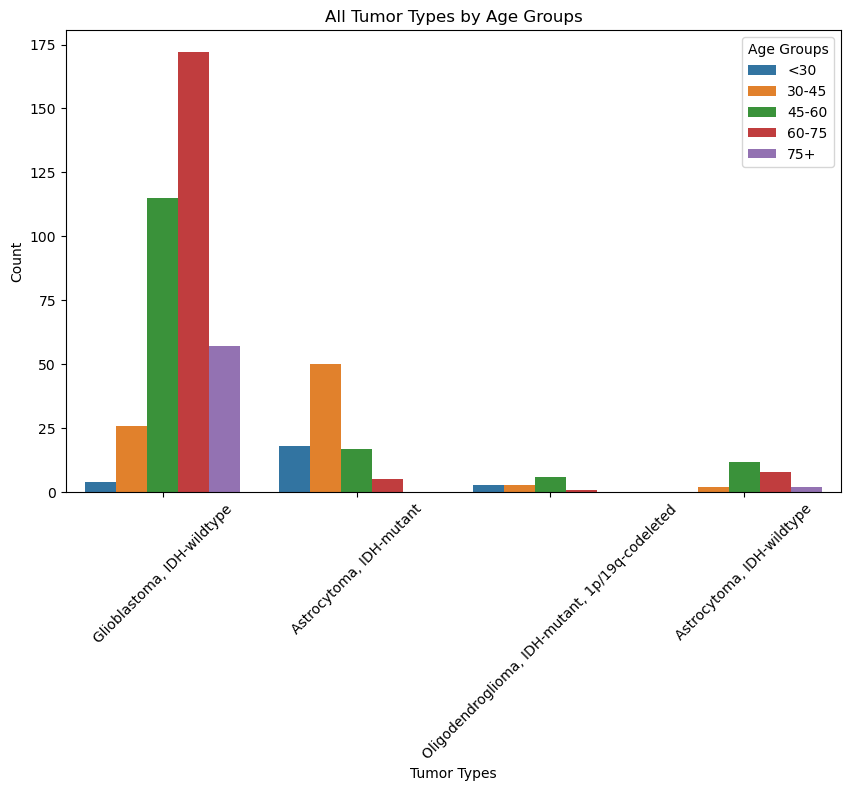

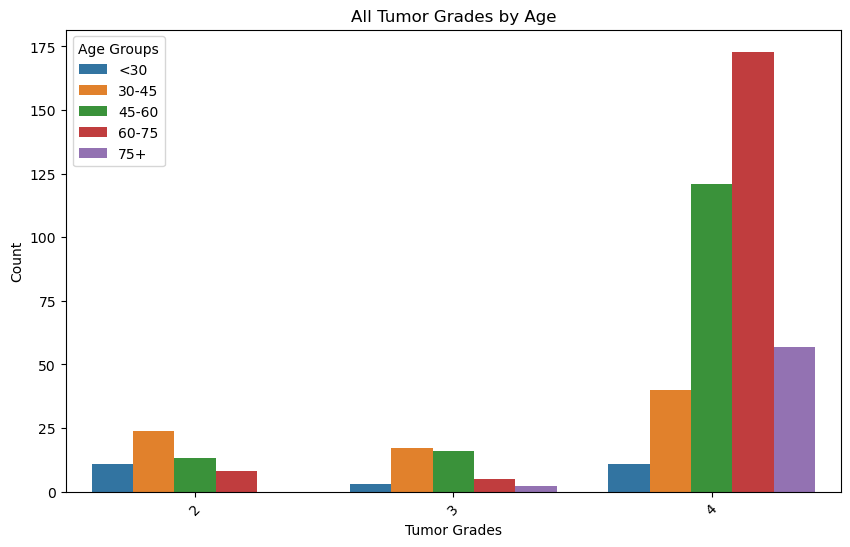

In [15]:
print(min(df["Age at MRI"]))
print(max(df["Age at MRI"]))

bins=[15, 30, 45, 60, 75, 100]
labels=["<30", "30-45", "45-60", "60-75", "75+"]
df["Age_Group"] = pd.cut(df["Age at MRI"], bins=bins, labels=labels, right=False)

print(df["Age_Group"].value_counts(normalize=True))

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="Final pathologic diagnosis (WHO 2021)",
    hue="Age_Group"        
)

plt.title("All Tumor Types by Age Groups")
plt.xticks(rotation=45)
plt.xlabel("Tumor Types")
plt.ylabel("Count")
plt.legend(title="Age Groups")
plt.show()

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="WHO CNS Grade",
    hue="Age_Group"  
)

plt.title("All Tumor Grades by Age")
plt.xticks(rotation=45)
plt.xlabel("Tumor Grades")
plt.ylabel("Count")
plt.legend(title="Age Groups")
plt.show()


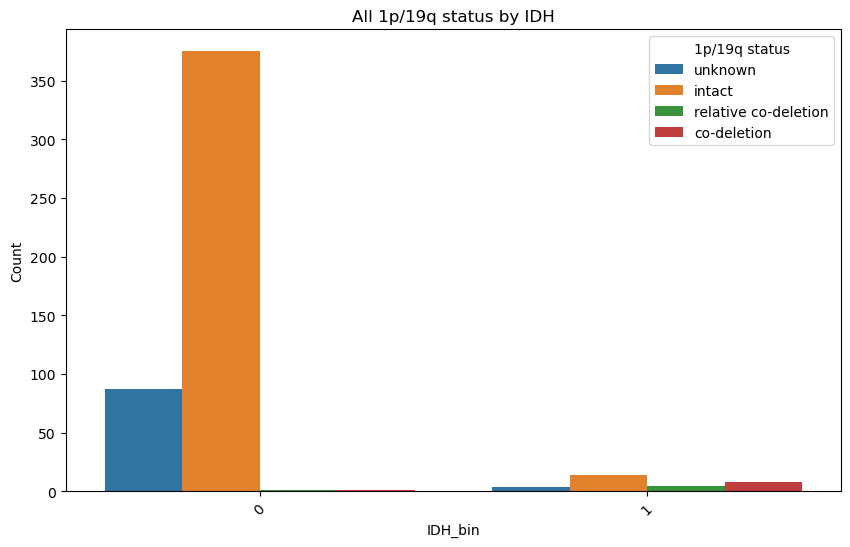

In [63]:
plt.figure(figsize=(10,6))

df['IDH_bin'] = df['IDH'].apply(lambda x: 1 if 'mutated' in x else 0)

sns.countplot(
    data=df,
    x="IDH_bin",
    hue="1p/19q"  
)

plt.title("All 1p/19q status by IDH")
plt.xticks(rotation=45)
plt.xlabel("IDH_bin")
plt.ylabel("Count")
plt.legend(title="1p/19q status")
plt.show()

It does look like in Glioblastoma+IDH-wildtype (the most aggresive type) and in grade 4, older patients make up a substantial proportion. Note also that majority of the dataset are in this type (75%) and this grade (80%).

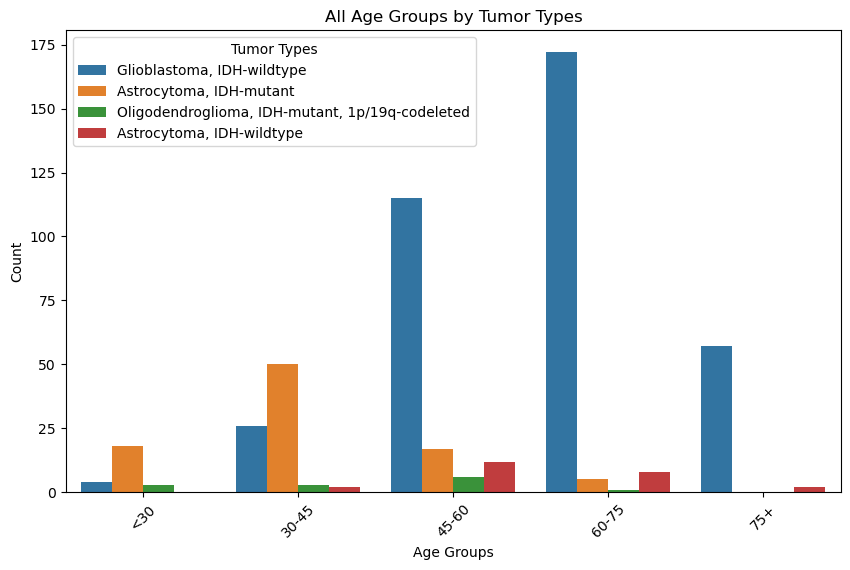

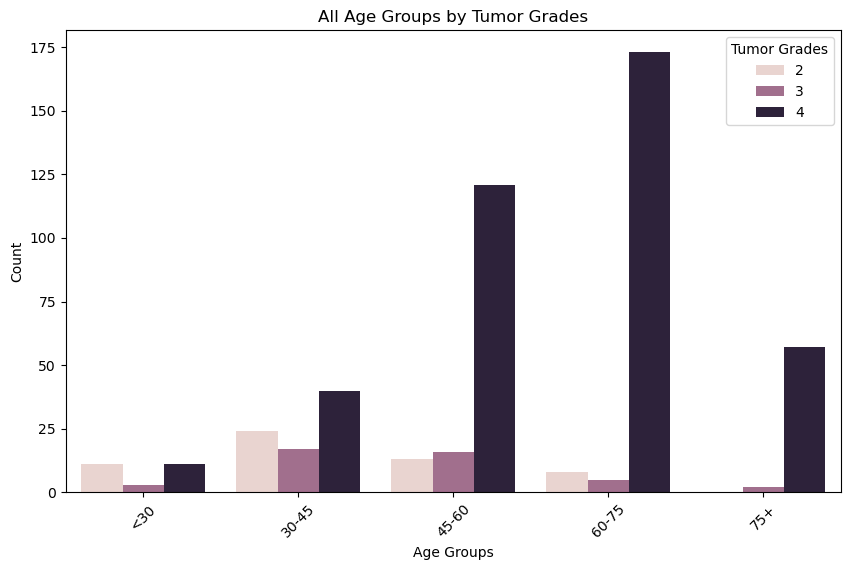

In [17]:
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    hue="Final pathologic diagnosis (WHO 2021)",
    x="Age_Group"        
)

plt.title("All Age Groups by Tumor Types")
plt.xticks(rotation=45)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.legend(title="Tumor Types")
plt.show()

plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    hue="WHO CNS Grade",
    x="Age_Group"  
)

plt.title("All Age Groups by Tumor Grades")
plt.xticks(rotation=45)
plt.xlabel("Age Groups")
plt.ylabel("Count")
plt.legend(title="Tumor Grades")
plt.show()

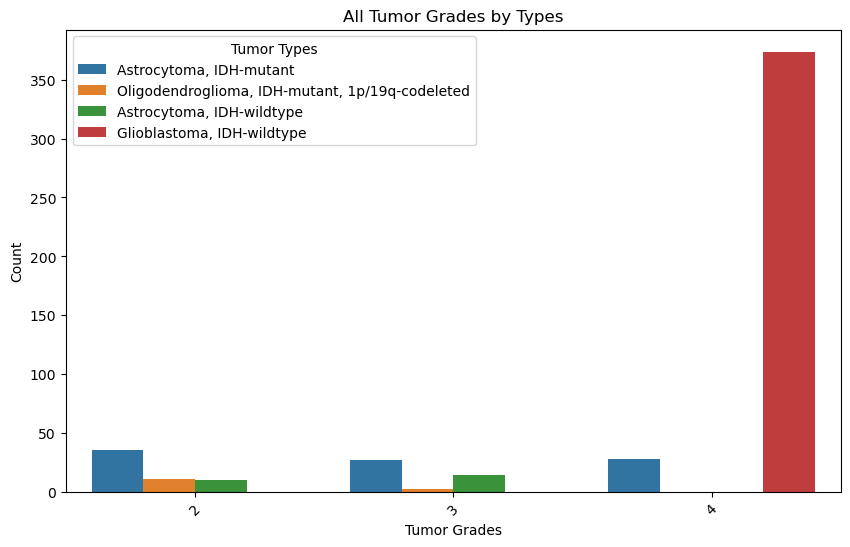

In [31]:
#plots: Grades vs Types
plt.figure(figsize=(10,6))

sns.countplot(
    data=df,
    x="WHO CNS Grade",
    hue="Final pathologic diagnosis (WHO 2021)"
)

plt.title("All Tumor Grades by Types")
plt.xticks(rotation=45)
plt.xlabel("Tumor Grades")
plt.ylabel("Count")
plt.legend(title="Tumor Types")
plt.show()

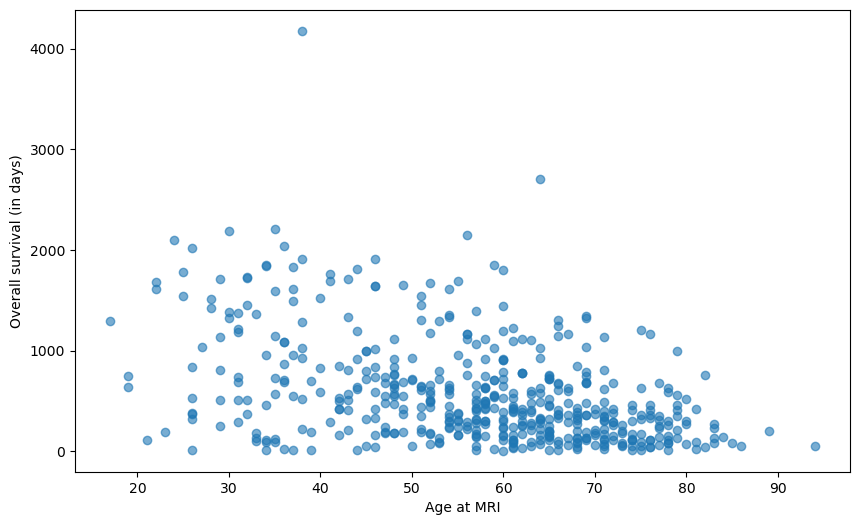

In [21]:
#Age groups vs OS
plt.figure(figsize=(10,6))
plt.scatter(df["Age at MRI"], df["OS"], alpha=0.6)
plt.xlabel("Age at MRI")
plt.ylabel("Overall survival (in days)")
plt.show()

There is an "outlier" (age 40 ish with >4000 OS) that makes it a bit harder to tell. But it's quite crowded in the middle bottom and right bottom. Remember also that 37% of the population is in age group 60-75 and 30% in 45-60.

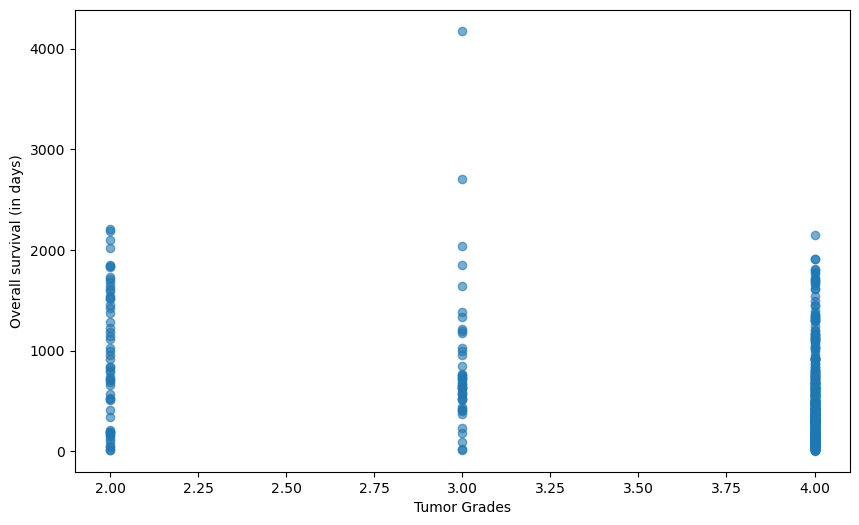

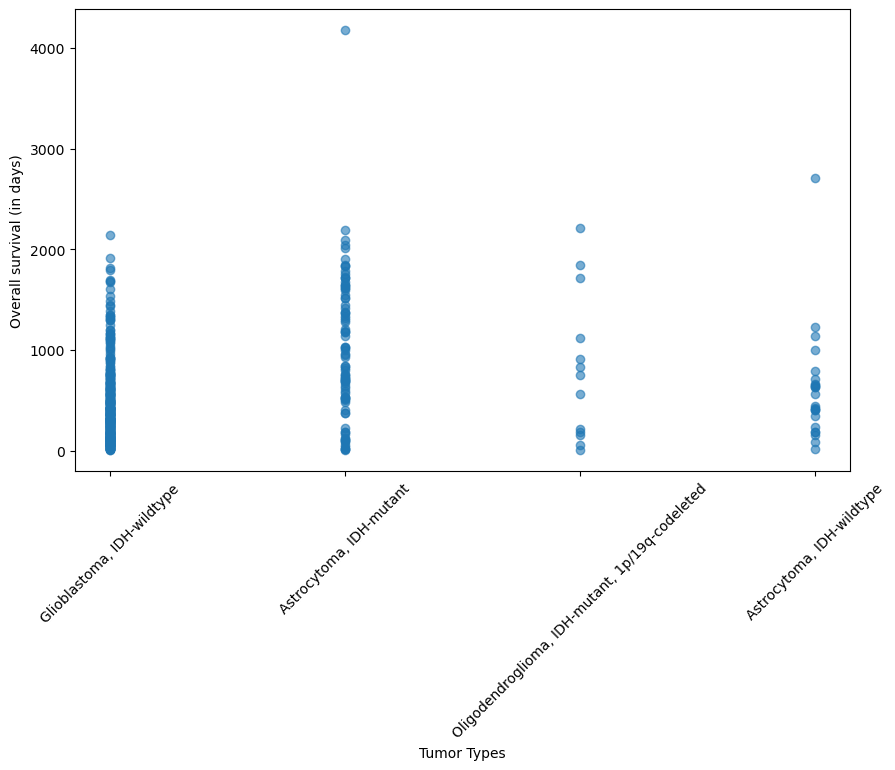

In [32]:
#tumor types vs OS
plt.figure(figsize=(10,6))
plt.scatter(df["WHO CNS Grade"], df["OS"], alpha=0.6)
plt.xlabel("Tumor Grades")
plt.ylabel("Overall survival (in days)")
plt.show()


#tumor grades vs OS
plt.figure(figsize=(10,6))
plt.scatter(df["Final pathologic diagnosis (WHO 2021)"], df["OS"], alpha=0.6)
plt.xticks(rotation=45)
plt.xlabel("Tumor Types")
plt.ylabel("Overall survival (in days)")
plt.show()

Summary:
...

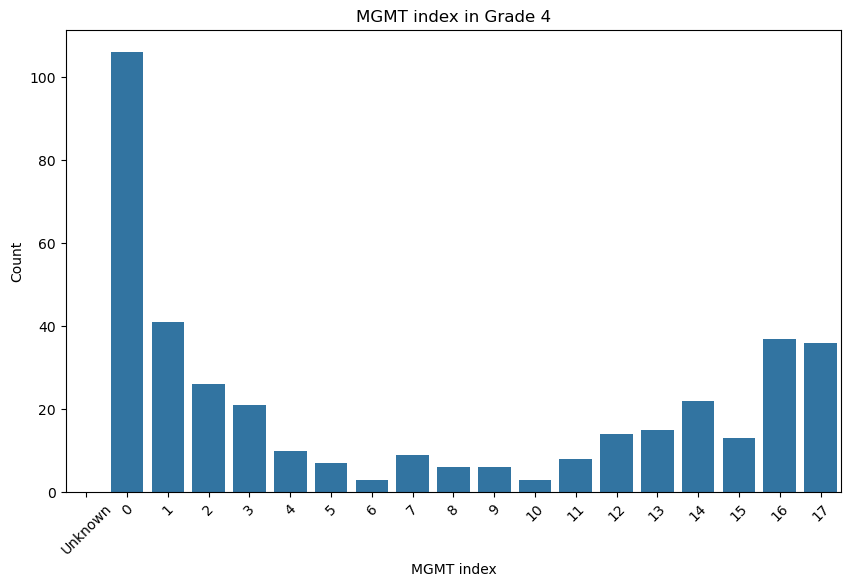

In [52]:
plt.figure(figsize=(10,6))
mgmt_order = ["Unknown"] + list(range(0, 18))

sns.countplot(
    data=df[df["WHO CNS Grade"]== 4],
    x="MGMT index", 
    order=mgmt_order
)

plt.title("MGMT index in Grade 4")
plt.xticks(rotation=45)
plt.xlabel("MGMT index")
plt.ylabel("Count")
plt.show()

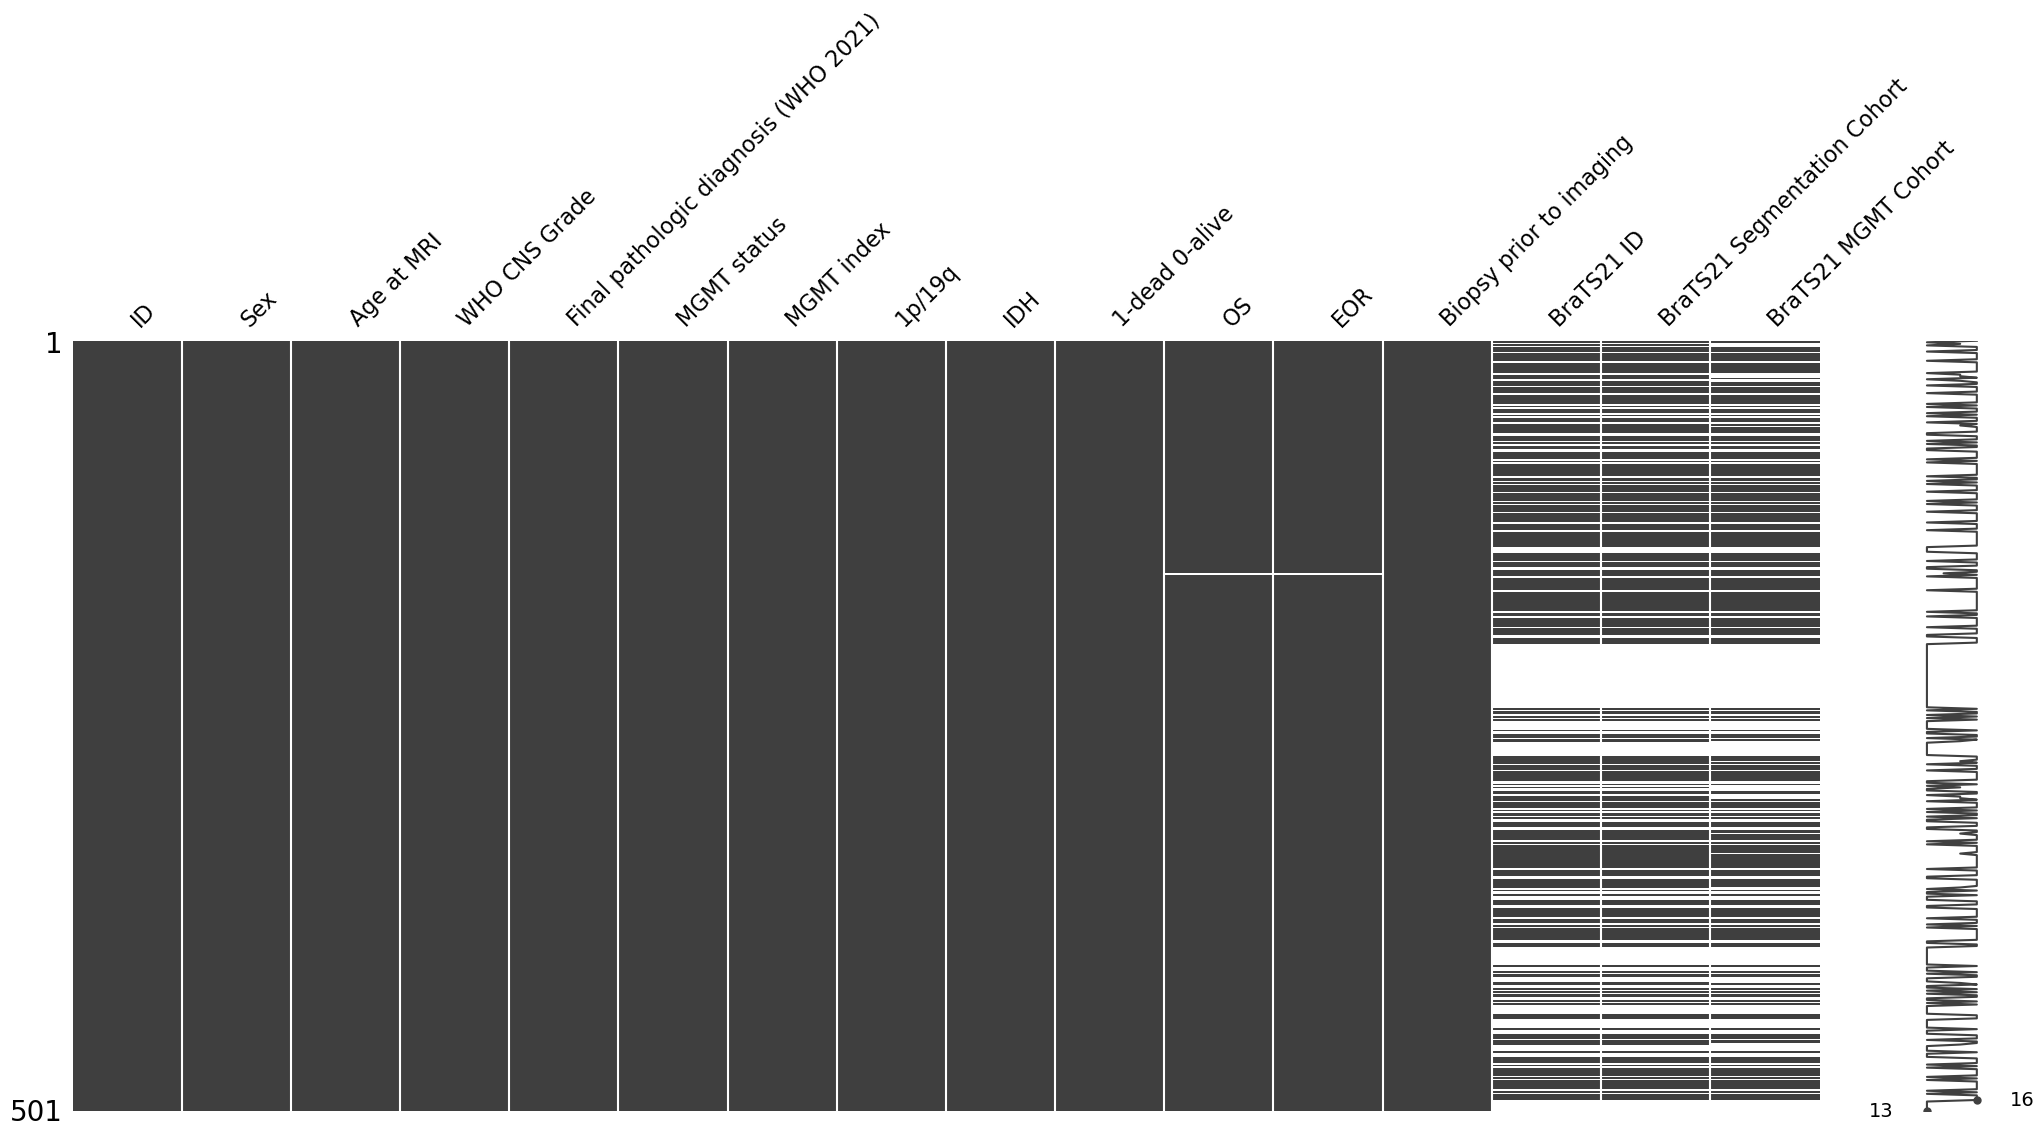

In [18]:
#Missing values

msno.matrix(df)
plt.show()

We plan to use multinomial logistic regression. For categorical variables (gender, IDH mutations, 1p/19q), we will just use dummy variables. For continuous variables like Age at MRI, let's see whether the log odds of each grade relative to a reference class (we are picking grade 2 as reference below) is linear dependent on age. 

         Current function value: 0.397305
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:          WHO CNS Grade   No. Observations:                  495
Model:                        MNLogit   Df Residuals:                      479
Method:                           MLE   Df Model:                           14
Date:                Tue, 21 Oct 2025   Pseudo R-squ.:                  0.3766
Time:                        14:00:56   Log-Likelihood:                -196.67
converged:                      False   LL-Null:                       -315.46
Covariance Type:            nonrobust   LLR p-value:                 1.047e-42
         WHO CNS Grade=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       16.7136   9171.495      0.002      0.999    -1.8e+04     1.8e+04
Age at MRI             

D:\Anaconda3\envs\erdos_ds_environment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda3\envs\erdos_ds_environment\Lib\site-packages\statsmodels\discrete\discrete_model.py:5475: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


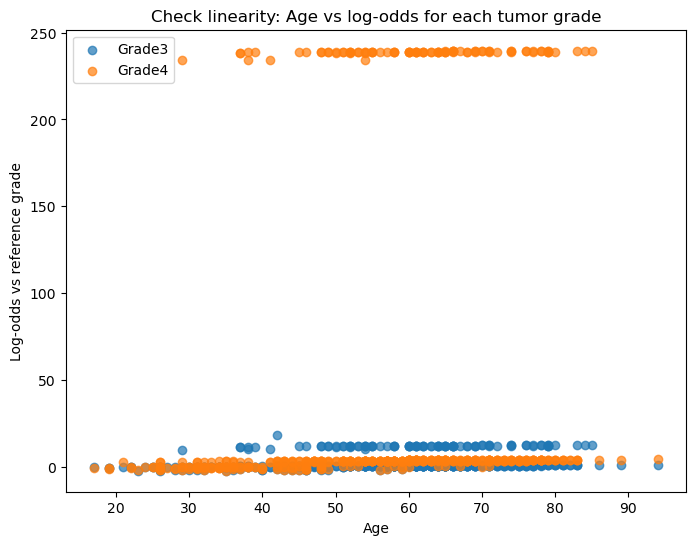

In [44]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# df['1p/19q_bin'] = df['1p/19q'].apply(lambda x: 1 if x=='relative co-deletion' else 0)
# df['IDH_bin'] = df['IDH'].apply(lambda x: 1 if 'mutated' in x else 0)

# Simplify 1p/19q
df['1p/19q_simple'] = df['1p/19q'].replace({
    'relative co-deletion': 'co-deletion',
    'intact': 'intact',
    'unknown': 'unknown'
})

# Simplify IDH
df['IDH_simple'] = df['IDH'].replace({
    'IDH1 p.R132C': 'mutated',
    'IDH1 p.R132G': 'mutated',
    'IDH1 p.R132H': 'mutated',
    'IDH1 p.R132S': 'mutated',
    'IDH2 p.Arg172Trp': 'mutated',
    'IDH2 p.R172K': 'mutated',
    'IDH_mutated (NOS)': 'mutated',
    'IDH_wildtype': 'wildtype'
})


X = df[['Age at MRI', 'Sex', '1p/19q_simple', 'IDH_simple']]  
X = pd.get_dummies(X, drop_first=True)
X = X.astype(float)
X_const = sm.add_constant(X)
y = df['WHO CNS Grade'].astype(int)

model = sm.MNLogit(y, X_const)
result = model.fit()
print(result.summary())

pred_probs = result.predict()  # shape: (n_samples, n_classes)

ref = 0  #choose a reference class; may change
classes = np.arange(pred_probs.shape[1])

plt.figure(figsize=(8,6))

for grade in classes:
    if grade == ref:
        continue
    log_odds = np.log(pred_probs[:, grade] / pred_probs[:, ref])
    plt.scatter(df['Age at MRI'], log_odds, alpha=0.7, label=f'Grade{grade + 2}') 

plt.xlabel('Age')
plt.ylabel('Log-odds vs reference grade')
plt.title('Check linearity: Age vs log-odds for each tumor grade')
plt.legend()
plt.show()

In [33]:
print(df.dtypes)
print(X.dtypes)
print(y.dtype)

ID                                        object
Sex                                       object
Age at MRI                                 int64
WHO CNS Grade                              int64
Final pathologic diagnosis (WHO 2021)     object
MGMT status                               object
MGMT index                                object
1p/19q                                    object
IDH                                       object
1-dead 0-alive                             int64
OS                                       float64
EOR                                       object
Biopsy prior to imaging                   object
BraTS21 ID                                object
BraTS21 Segmentation Cohort               object
BraTS21 MGMT Cohort                       object
dtype: object
Age at MRI                     int64
Sex_M                           bool
1p/19q_intact                   bool
1p/19q_relative co-deletion     bool
1p/19q_unknown                  bool
IDH_IDH1 p.R132C 

In [61]:
print(len(df[df["1p/19q"]=="unknown"]))
print(len(df[(df["1p/19q"]=="unknown") & (df["WHO CNS Grade"]==4)]))

print(len(df[df["1p/19q"]=="co-deletion"]))
print(len(df[(df["1p/19q"]=="co-deletion") & (df["WHO CNS Grade"]==2)]))


print(f"Percentage of intact 1p/19q in each grade:", df.groupby("WHO CNS Grade")["1p/19q"].apply(lambda x: (x.isna() | (x == "intact")).sum()/len(x)))
print(f"Percentage of 1p/19q codeletion in each grade:", df.groupby("WHO CNS Grade")["1p/19q"].apply(lambda x: (x.isna() | (x == "co-deletion")).sum()/len(x)))
print(f"Percentage of 1p/19q relative codeletion in each grade:", df.groupby("WHO CNS Grade")["1p/19q"].apply(lambda x: (x.isna() | (x == "relative co-deletion")).sum()/len(x)))
print(f"Percentage of 1p/19q unknown in each grade:", df.groupby("WHO CNS Grade")["1p/19q"].apply(lambda x: (x.isna() | (x == "unknown")).sum()/len(x)))

91
91
9
9
Percentage of intact 1p/19q in each grade: WHO CNS Grade
2    0.803571
3    0.953488
4    0.765152
Name: 1p/19q, dtype: float64
Percentage of 1p/19q codeletion in each grade: WHO CNS Grade
2    0.160714
3    0.000000
4    0.000000
Name: 1p/19q, dtype: float64
Percentage of 1p/19q relative codeletion in each grade: WHO CNS Grade
2    0.035714
3    0.046512
4    0.005051
Name: 1p/19q, dtype: float64
Percentage of 1p/19q unknown in each grade: WHO CNS Grade
2    0.000000
3    0.000000
4    0.229798
Name: 1p/19q, dtype: float64


In [47]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# 1. Prepare data
# -----------------------------
# Collapse categorical variables to binary
df['1p/19q_bin'] = df['1p/19q'].apply(lambda x: 1 if x=='relative co-deletion' else 0)
df['IDH_bin'] = df['IDH'].apply(lambda x: 1 if 'mutated' in x else 0)
df['Sex_bin'] = df['Sex'].apply(lambda x: 1 if x=='M' else 0)

# Features and target
X = df[['Age at MRI', 'Sex_bin', '1p/19q', 'IDH']]
y = df['WHO CNS Grade'].astype(int)  # 2, 3, 4

# Optionally scale numeric features
scaler = StandardScaler()
X[['Age at MRI']] = scaler.fit_transform(X[['Age at MRI']])

# -----------------------------
# 2. Train multinomial logistic regression
# -----------------------------
clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    penalty='l2',
    max_iter=1000
)
clf.fit(X, y)

# -----------------------------
# 3. Predictions
# -----------------------------
y_pred = clf.predict(X)
y_prob = clf.predict_proba(X)  # probabilities for each class

# -----------------------------
# 4. Evaluation
# -----------------------------
print("Accuracy:", accuracy_score(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))

# -----------------------------
# 5. Coefficients
# -----------------------------
coef_df = pd.DataFrame(clf.coef_, columns=X.columns, index=[f"Grade {cls}" for cls in clf.classes_])
print("\nCoefficients:\n", coef_df)


C:\Users\Windows 10\AppData\Local\Temp\ipykernel_10684\648848145.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age at MRI']] = scaler.fit_transform(X[['Age at MRI']])


ValueError: could not convert string to float: 'unknown'

D:\Anaconda3\envs\erdos_ds_environment\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


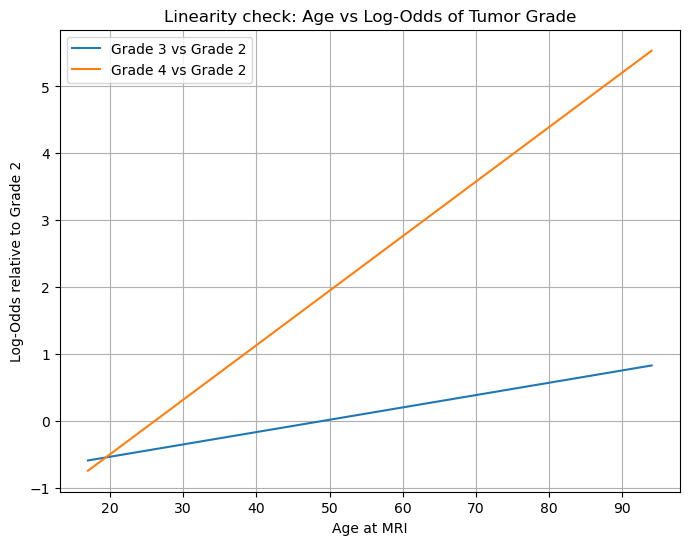

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1. Generate a smooth age range for plotting
# -----------------------------
age_range = np.linspace(df['Age at MRI'].min(), df['Age at MRI'].max(), 100)
age_scaled = scaler.transform(age_range.reshape(-1, 1))  # scale to match training

# Hold other features constant (e.g., Sex=0, 1p/19q=0, IDH=0)
# This isolates the effect of Age on tumor grade
X_plot = pd.DataFrame({
    'Age at MRI': age_scaled.flatten(),
    'Sex_bin': 0,
    '1p/19q_bin': 0,
    'IDH_bin': 0
})

# -----------------------------
# 2. Compute predicted probabilities and log-odds
# -----------------------------
probs = clf.predict_proba(X_plot)  # shape (n_points, n_classes)

# Convert to log-odds relative to Grade 2 (the reference class)
ref_idx = np.where(clf.classes_ == 2)[0][0]
log_odds = np.log(probs / probs[:, [ref_idx]])  # divide each column by Grade 2 prob

# -----------------------------
# 3. Plot log-odds vs Age
# -----------------------------
plt.figure(figsize=(8, 6))
for i, grade in enumerate(clf.classes_):
    if grade == 2:  # skip reference
        continue
    plt.plot(age_range, log_odds[:, i], label=f"Grade {grade} vs Grade 2")

plt.xlabel("Age at MRI")
plt.ylabel("Log-Odds relative to Grade 2")
plt.title("Linearity check: Age vs Log-Odds of Tumor Grade")
plt.legend()
plt.grid(True)
plt.show()


In [51]:
print(len(df[df["1p/19q"]=="unknown"]))
print(len(df[(df["1p/19q"]=="unknown") & (df["WHO CNS Grade"]==4)]))

91
91
